In [3]:
#import necessary packages
#from pathlib import Path
import pandas as pd
import numpy as np 
from datetime import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as py
import yfinance as yf 
%matplotlib inline


# Pulling stock information using yfinance 




In [4]:
#using 10 year worth of stock information for analysis
#setting date for retrieving stock price info
start_date = datetime.now() - pd.DateOffset(years=13)
end_date = datetime.now()

In [5]:
#define ticker
ticker = ['TSLA']
t_list =[]
for x in ticker:
    data = yf.download(ticker, start=start_date, end=end_date)
    t_list.append(data)
tsla_df = pd.concat(t_list, keys=ticker, names=['Ticker', 'Date'])
tsla_df = tsla_df.reset_index()
tsla = yf.Ticker("TSLA")
#tsla_df = tsla.history(start='2010-01-01', end='2023-12-25')
#tsla_df = tsla_df.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [6]:
display(tsla_df.head(10))
display(tsla_df.tail(10))

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,TSLA,2010-12-27,1.868000,1.905333,1.670667,1.703333,1.703333,139528500
1,TSLA,2010-12-28,1.723333,1.783333,1.666667,1.760667,1.760667,60844500
2,TSLA,2010-12-29,1.802000,1.867333,1.766667,1.848667,1.848667,49788000
3,TSLA,2010-12-30,1.846667,1.860000,1.758667,1.766667,1.766667,30616500
4,TSLA,2010-12-31,1.771333,1.816667,1.766667,1.775333,1.775333,21268500
5,TSLA,2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
6,TSLA,2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
7,TSLA,2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
8,TSLA,2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
9,TSLA,2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
3261,TSLA,2023-12-11,242.740005,243.440002,237.449997,239.740005,239.740005,97913900
3262,TSLA,2023-12-12,238.550003,238.990005,233.869995,237.009995,237.009995,95328300
3263,TSLA,2023-12-13,234.190002,240.300003,228.199997,239.289993,239.289993,146286300
3264,TSLA,2023-12-14,241.220001,253.880005,240.789993,251.050003,251.050003,160829200
3265,TSLA,2023-12-15,251.210007,254.130005,248.300003,253.500000,253.500000,135720800
3266,TSLA,2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500
3267,TSLA,2023-12-19,253.479996,258.339996,253.009995,257.220001,257.220001,106737400
3268,TSLA,2023-12-20,256.410004,259.839996,247.000000,247.139999,247.139999,125097000
3269,TSLA,2023-12-21,251.899994,254.800003,248.550003,254.500000,254.500000,109594200
3270,TSLA,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800


# Visualize tsla data

<Axes: xlabel='Date'>

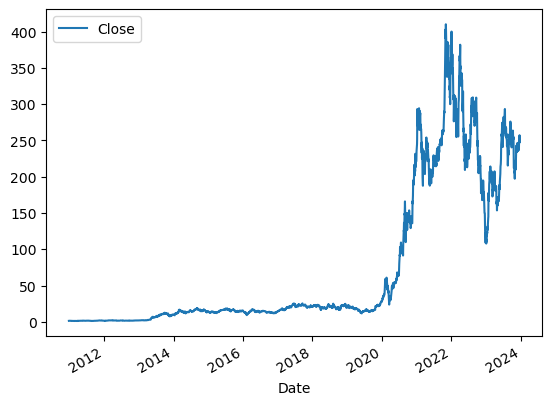

In [7]:
#Stock performance over the last 10 years using the closing price
#tsla_df['Close']
#py.figure()
tsla_df.plot.line(x='Date',y='Close',use_index=True)
#py.show()

* Based on the close price of TSLA over the past 10 year,we can conclude that TSLA had a steady growth from 2010 up until 2020.
* In 2020, there was a sharp increase in the stock price to about $300 experiencing a drawdown between $150 and $200 price range.
* Once the stock price hit 400 there was a retracement - from a technically point of view, having Lower Lows(LL) and Higher Highs(LH)

In [8]:
#using plotly.express to visualize tsla
viz = px.area(
    tsla_df,
    x='Date',
    y='Close',
    facet_col='Ticker',
    title="Tesla Closing Stock Price between 2010 & 2023",
    labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company Name'}
)
viz.show()

# Algorithmic Calculations

In [9]:
#Calculate Daily Returns (difference between the opening and closing price)
daily_returns = tsla_df.groupby('Ticker')['Close'].pct_change()
daily_returns.head()

0         NaN
1    0.033660
2    0.049981
3   -0.044356
4    0.004905
Name: Close, dtype: float64

<Axes: >

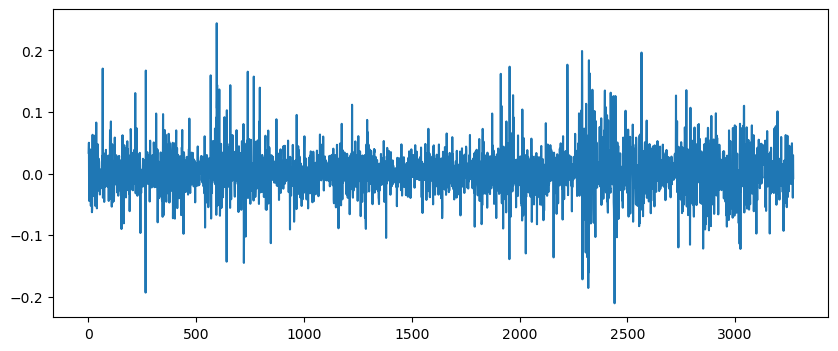

In [10]:
#plot daily returns for tsla
daily_returns.plot(figsize=(10,4))

# PERFORMING QUANTITATIVE ANALYSIS

In [11]:
#Calculate and plot cumulative returns
cumulative_returns =1 + (tsla_df.groupby('Ticker')['Close']).cumprod()
cumulative_returns.head()

0     2.703333
1     3.999002
2     6.544156
3    10.794678
4    18.388816
Name: Close, dtype: float64

# RISK ANALYSIS

* For risk analysis we will be performing:
* Visualize a box plot to measure risk
* Calculate standard deviation and annualized standard deviation


<Axes: >

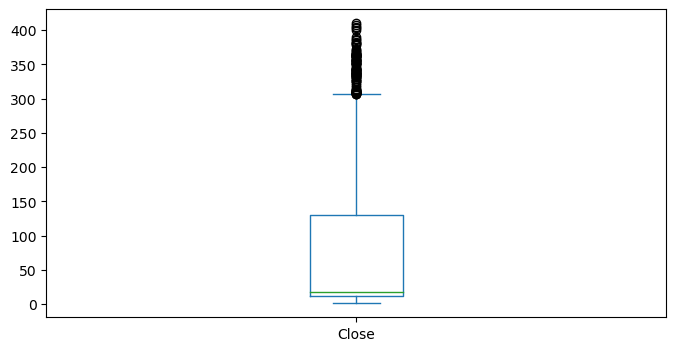

In [12]:
#visualize risk using box plot
new_df = tsla_df[['Close']]
new_df.plot(kind='box',figsize=(8,4))

In [13]:
# Standard deviation calculation
s_dev = new_df.std()
s_dev

Close    102.350198
dtype: float64

In [14]:
# annualized standard deviation
ann_std = s_dev * np.sqrt(252)
ann_std

Close    1624.759021
dtype: float64

# RollinG Statistics
* Due to the constant risk changes, we are implementing rolling statistics to access risk over time
* We will perform the following mathematical calculations
1. rolling standard deviation using 21_day window
2. calculate correlation 
3. 60-day rolling beta 

<Axes: >

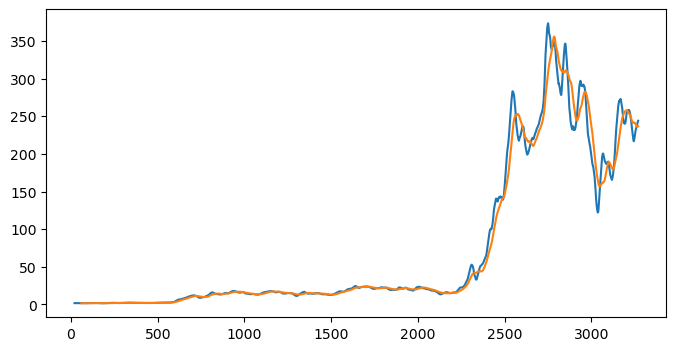

In [15]:
# rolling mean calculation for 21 day window
tsla_df['MA21'] = tsla_df.groupby('Ticker')['Close'].rolling(window=21).mean().reset_index(0, drop=True)
tsla_df['MA60'] = tsla_df.groupby('Ticker')['Close'].rolling(window=60).mean().reset_index(0, drop=True)
#Visualize the rolling mean
tsla_df['MA21'].plot(figsize=(8,4))
tsla_df['MA60'].plot(figsize=(8,4))

In [16]:
#for x, groupby in tsla_df.groupby('Ticker'):
fig = px.line(
        tsla_df,
        x='Date',
        y=['Close', 'MA21', 'MA60'],
        title='TSLA Moving Average'
        #title=f'{x} Moving Average'
)
fig.show()

# EMA: Exponential Weighted Average
* Exponential Moving Average, EMA, assigns greater importance to more recent observations. 
* We will be using the 21_day half-life for TSLA stock using the standard deviation(std) as the metric of interest

In [17]:
#applying 'ewm' to calculate the rolling window
tsla_df['EMA21'] = tsla_df.groupby('Ticker')['Close'].ewm(halflife=21).std().reset_index(0, drop=True)

In [18]:
fig = px.line(
        tsla_df,
        x='Date',
        y=['Close','EMA21'],
        title='TSLA Close versus Exponential Moving Average'
)
fig.show()

In [19]:
# Volatility Analysis
tsla_df['Volatility'] = tsla_df.groupby('Ticker')['Close'].pct_change().rolling(window=14).std().reset_index(0, drop=True)
fig_1 = px.line(
    tsla_df,
    x='Date',
    y='Volatility',
    color='Ticker',
    title='TSLA Volatility'
)
fig_1.show()

In [41]:
# Sharpe ratio
sharpe = (tsla_df['Close'].mean()*252) / ann_std
sharpe

Close    11.304099
dtype: float64